In [12]:
import stan as ps
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import preliz as pz

az.style.use("arviz-grayscale")

# Importing nest_asyncio is only necessary to run pystan in Jupyter Notebooks.
import nest_asyncio
nest_asyncio.apply()

[]

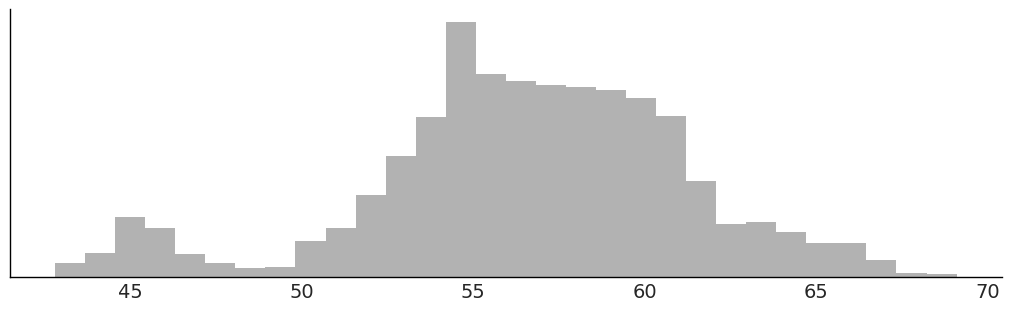

In [18]:
cs = pd.read_csv("https://raw.githubusercontent.com/aloctavodia/BAP3/main/code/data/chemical_shifts_theo_exp.csv")
cs_exp = cs['exp'].values
_, ax = plt.subplots(figsize=(10, 3))
ax.hist(cs_exp, density=True, bins=30, alpha=0.3)
ax.set_yticks([])

In [19]:
mix_gauss = '''
data {
  int<lower=1> K;          // number of mixture components
  int<lower=1> N;          // number of data points
  array[N] real y;         // observations
}
parameters {
  simplex[K] theta;          // mixing proportions
  ordered[K] mu;             // locations of mixture components
  real<lower = 0> sigma;  // scales of mixture components
}
model {
  vector[K] log_theta = log(theta);  // cache log calculation
  sigma ~ lognormal(0, 2);
  mu ~ normal(0, 10);
  for (n in 1:N) {
    vector[K] lps = log_theta;
    for (k in 1:K) {
      lps[k] += normal_lpdf(y[n] | mu[k], sigma);
    }
    target += log_sum_exp(lps);
    }
  }
}
'''

In [20]:
d = {'K': 2,
     'N': len(cs_exp),
     'y': cs_exp}

In [21]:
# Compile stan model to C++ to sample posterior below.
sm = ps.build(mix_gauss, data=d, random_seed=1)

Building...

Error handling request
Traceback (most recent call last):
  File "/home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/aiohttp/web_protocol.py", line 452, in _handle_request
    resp = await request_handler(request)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/aiohttp/web_app.py", line 543, in _handle
    resp = await handler(request)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/views.py", line 103, in handle_create_model
    _, stanc_warnings = httpstan.compile.compile(program_code, stan_model_name)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/harrison/anaconda3/envs/pystan_env/lib/python3.11/site-packages/httpstan/compile.py", line 37, in compile
    completed_process = subprocess.run(run_args, capture_output=True, timeout=1)
                        ^^^^^^^^^^^^^^^^^^^^^

ValueError: TAPE_ERROR: The JSON document has an improper structure: missing or superfluous commas, braces, missing keys, etc.